<h1> Earthquake exercise <\>

In [164]:
import requests
quakes = requests.get("http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
                      params={
                          'starttime': "2000-01-01",
                          "maxlatitude": "58.723",
                          "minlatitude": "50.008",
                          "maxlongitude": "1.67",
                          "minlongitude": "-9.756",
                          "minmagnitude": "1",
                          "endtime": "2018-10-11",
                          "orderby": "time-asc"}
                      )

quakes.text[0:100]

'{"type":"FeatureCollection","metadata":{"generated":1571917196000,"url":"https://earthquake.usgs.gov'

In [165]:
import json
# using json to load string to make it Python
json_request = json.loads(quakes.text)
type(json_request)

dict

In [166]:
# calling keys to see what is in the dictionary
json_request.keys()

dict_keys(['type', 'metadata', 'features', 'bbox'])

In [167]:
json_request["features"];
# is a list

In [168]:
# keys of the features dictionary
json_request["features"][0].keys()

dict_keys(['type', 'properties', 'geometry', 'id'])

In [169]:
json_request["features"][0]['properties']

{'mag': 2.6,
 'place': 'England, United Kingdom',
 'time': 956553055700,
 'updated': 1415322596133,
 'tz': None,
 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009rst',
 'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=usp0009rst&format=geojson',
 'felt': None,
 'cdi': None,
 'mmi': None,
 'alert': None,
 'status': 'reviewed',
 'tsunami': 0,
 'sig': 104,
 'net': 'us',
 'code': 'p0009rst',
 'ids': ',usp0009rst,',
 'sources': ',us,',
 'types': ',impact-text,origin,phase-data,',
 'nst': None,
 'dmin': None,
 'rms': None,
 'gap': None,
 'magType': 'ml',
 'type': 'earthquake',
 'title': 'M 2.6 - England, United Kingdom'}

In [170]:
json_request["features"][0]['properties'].keys()

dict_keys(['mag', 'place', 'time', 'updated', 'tz', 'url', 'detail', 'felt', 'cdi', 'mmi', 'alert', 'status', 'tsunami', 'sig', 'net', 'code', 'ids', 'sources', 'types', 'nst', 'dmin', 'rms', 'gap', 'magType', 'type', 'title'])

In [171]:
# printing out amplitude of the earthquake
json_request["features"][0]['properties']['mag']
json_request["features"][1]['properties']['mag']

4

In [172]:
# coordinates
json_request["features"][0]['geometry']['coordinates']


[-2.81, 54.77, 14]

In [173]:
print("At coordinates:")
print(json_request["features"][0]['geometry']['coordinates'])
print("The maximal aplitude of the eathquake:")
print(json_request["features"][0]['properties']['mag'])

At coordinates:
[-2.81, 54.77, 14]
The maximal aplitude of the eathquake:
2.6


In [174]:
type(json_request["features"])

list

In [190]:
data = json_request["features"]
x = data[0]
for element in data:
    #print(x)
    # each element in data is called datax (the list is called datax)
    if x["properties"]["mag"] < element["properties"]["mag"]:
        x = element
print(x["properties"]["mag"] )

4.8


In [202]:
coordinatesx = x["geometry"]['coordinates']
coordinatesx
# unpacking more at the same time
long, lat, something = x["geometry"]['coordinates']
place1 = [long, lat, something]
print(place1)

[-2.15, 52.52, 9.4]


In [204]:
# MULTIPLE MAXIMA POSSIBLE - FIND THEM
for element in data:
     if element["properties"]["mag"] == x["properties"]["mag"]:
            place2 = element["geometry"]['coordinates']
            print(place2)

[-2.15, 52.52, 9.4]
[-0.332, 53.403, 18.4]


In [197]:
print(place2[0])

-0.332


In [208]:
# all coordinates of places with max. amplitude concatenated
allcoordinates = [place1] + [place2]
print(allcoordinates)

[[-2.15, 52.52, 9.4], [-0.332, 53.403, 18.4]]


In [257]:
# unpacking more at the same time
long1, lat1, something1 = allcoordinates[0]
long2, lat2, something2 = allcoordinates[1]
print("First place with maximal earthquake amplitude:")
print("Longitude:")
print(long1)
print("Latitude:")
print(lat1)
print("Second place with maximal earthquake amplitude:")
print("Longitude:")
print(long2)
print("Latitude:")
print(lat2)

First place with maximal earthquake amplitude:
Longitude:
-2.15
Latitude:
52.52
Second place with maximal earthquake amplitude:
Longitude:
-0.332
Latitude:
53.403


In [258]:
print("First place:")
print("Latitude: {}, Longitude: {}".format(lat1,long1))
print("The maximal amplitude is:")
print(x["properties"]["mag"])
print("Second place:")
print("Latitude: {}, Longitude: {}".format(lat2,long2))
print("The maximal amplitude is:")
print(x["properties"]["mag"])

First place:
Latitude: 52.52, Longitude: -2.15
The maximal amplitude is:
4.8
Second place:
Latitude: 53.403, Longitude: -0.332
The maximal amplitude is:
4.8


In [272]:
# MAP of the first location
import requests


def request_map_at(lat, long, satellite=True,
                   zoom=10, size=(400, 400)):
    base = "https://static-maps.yandex.ru/1.x/?"

    params = dict(
        z=zoom,
        size="{},{}".format(size[0], size[1]),
        ll="{},{}".format(long, lat),
        l="sat" if satellite else "map",
        lang="en_US"
    )

    return requests.get(base, params=params)

In [273]:
map_png1 = request_map_at(lat1, long1, zoom=10, satellite=True)

52.52
-2.15


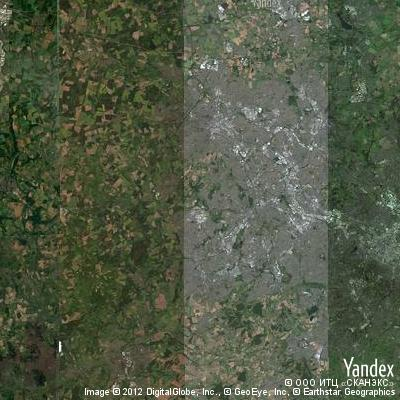

In [274]:
# display map
#from IPython.display import Image
#Image(map_png1.content)
print(lat1)
print(long1)
import IPython
IPython.core.display.Image(map_png1.content)

53.403
-0.332


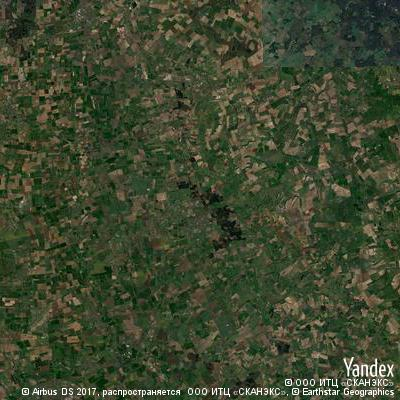

In [275]:
print(lat2)
print(long2)
map_png2 = request_map_at(lat2, long2, zoom=10, satellite=True)
#Image(map_png2.content)
IPython.core.display.Image(map_png2.content)